----
# LDA classification using self-made library
With LDA for dimensionality reduction to 5 dimensions

----

In [4]:
%load_ext autoreload
%autoreload 2

from sklearn.metrics import confusion_matrix as skconfmatrix
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Set correct working directory
if os.getcwd() != os.path.abspath("../Python"):
    os.chdir("../../Python")

# Import files from /Python directory
from confusion_matrix import confusion_matrix
"""
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "cmr"
})
"""

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


'\nplt.rcParams.update({\n    "text.usetex": True,\n    "font.family": "cmr"\n})\n'

In [5]:
# Load data sets
trn_data = pd.read_csv(f"../TrainingData/neodata/Training_500_each_run.csv")
tst_data = pd.read_csv(f"../TestData/neodata/Test_500_each_run.csv")

# Separate into data and targets
y_trn = trn_data.pop('target')
X_trn = trn_data.drop(['Psuc','CprPower', 'Density'], axis=1)


y_tst = tst_data.pop('target')
X_tst = tst_data.drop(['Psuc','CprPower', 'Density'], axis=1)

## Standardize data (z-norm)

In [6]:
from sklearn.preprocessing import StandardScaler

standardizer = StandardScaler()

X_trn = standardizer.fit_transform(X_trn)
X_tst = standardizer.transform(X_tst)

## LDA dimensionality reduction

In [7]:
import lda

reducer = lda.reducer(X_trn,y_trn,5)

X_tst = reducer.transform(X_tst)
X_trn = reducer.transform(X_trn)

Preserving 99.71% of variance


---

# LDA fitting

In [8]:
# Training the SVM, on the 5 dimensional data
from sklearn import svm

clf = lda.classifier( X_trn,y_trn )

# Classifying training data

(<Figure size 1000x1000 with 1 Axes>,
 <AxesSubplot: title={'center': 'LDA5-LDA on training set 500 each run : Accuracy 78.502%'}, xlabel='Predicted class', ylabel='True class'>)

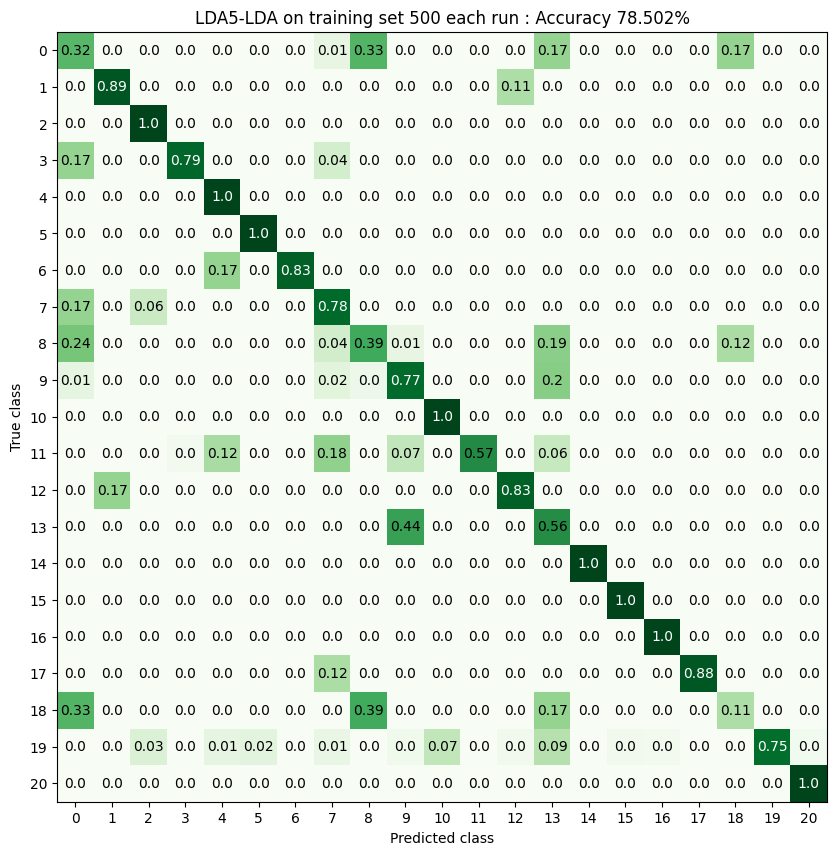

In [9]:
# Make predictions for the training set
y_hat_trn = clf.predict(X_trn)

#plot the confusion matrix
conf_matrix_trn = skconfmatrix(y_trn,y_hat_trn)
confusion_matrix(conf_matrix_trn, figsize = (10,10),title='LDA5-LDA on training set 500 each run', save_fig_name='LDA5-LDA 500 each training confusion matrix.pdf',eval_labels = False)

# Classifying test data

(<Figure size 1000x1000 with 1 Axes>,
 <AxesSubplot: title={'center': 'LDA5-LDA on test set 500 each run : Accuracy 71.429%'}, xlabel='Predicted class', ylabel='True class'>)

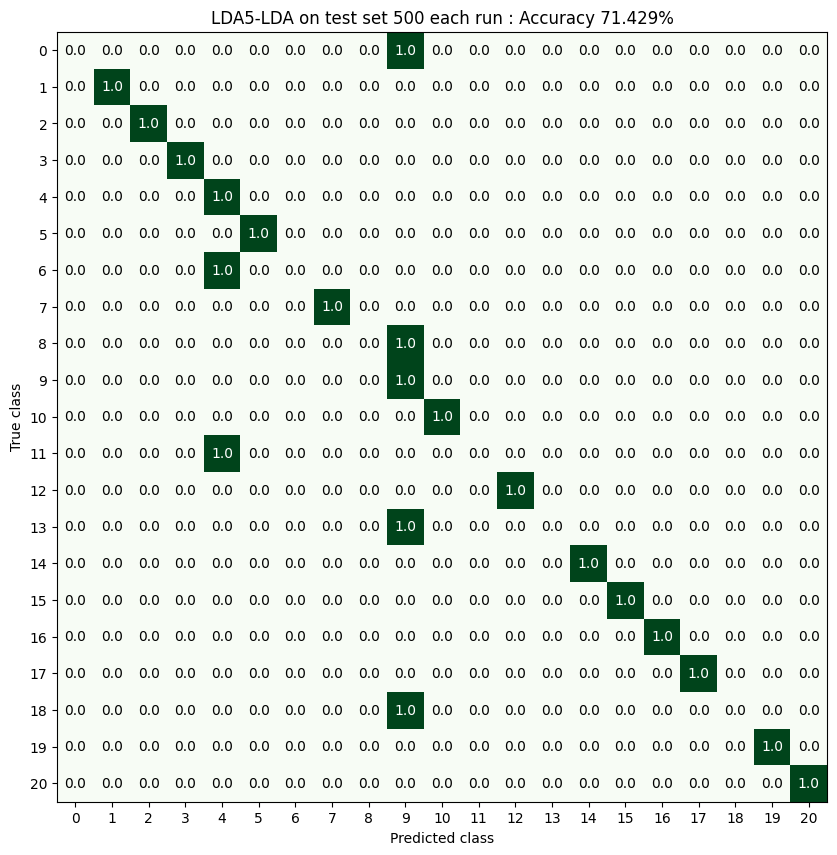

In [10]:
# Make predictions for the training set
y_hat_tst = clf.predict(X_tst)

#plot the confusion matrix
conf_matrix_vld = skconfmatrix(y_tst,y_hat_tst)
confusion_matrix(conf_matrix_vld, figsize = (10,10),title='LDA5-LDA on test set 500 each run', save_fig_name='LDA5-LDA 500 each test confusion matrix.pdf',eval_labels = False)